In [135]:
import pandas as pd  
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import missingno

# SaudianArabia
### Let's get to know the data

In [140]:
df = pd.read_csv('/Users/tatevikketikyan/Desktop/SaudianArabia.csv')

In [141]:
data = df.copy()
data.shape

(1025, 21)

In [142]:
data.dtypes

Unnamed: 0                int64
Name                     object
City                     object
Price                    object
Star_Rating               int64
Property_Demand          object
Property_id               int64
Customers_Rating        float64
Customers_Review         object
Type_of_room             object
reservations_Payment     object
Canelation               object
Max_persons              object
Bed_type                 object
Tax                      object
Review_title             object
Credit_card              object
Breakfst_included        object
Longitude_x             float64
Latitude_y              float64
Link                     object
dtype: object

In [143]:
data.isna().sum()

Unnamed: 0                0
Name                      0
City                      0
Price                     0
Star_Rating               0
Property_Demand         275
Property_id               0
Customers_Rating         69
Customers_Review         69
Type_of_room              1
reservations_Payment    290
Canelation              179
Max_persons               0
Bed_type                 19
Tax                       0
Review_title             69
Credit_card             321
Breakfst_included       941
Longitude_x               0
Latitude_y                0
Link                      0
dtype: int64

In [144]:
data.head(10)

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link
0,0,الريـم,Al Ula,SAR 179,5,Only 1 room left like this on our site,6330099,NaN,NaN,Economy Double Room,...,FREE cancellation,Max persons: 2,3 beds\n(3 large doubles),+SAR 0 taxes and charges,NaN,Reservation possible without a credit card,NaN,37.917525,26.648656,https://www.booking.com/hotel/sa/lrym.en-gb.ht...
1,1,Copper Crown Furnished Apartments,Khamis Mushayt,SAR 195,5,Only 2 rooms like this left on our site,5326174,9.0,169 reviews,Deluxe Room (2 Adults + 1 Child),...,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),includes taxes and charges,Superb,Reservation possible without a credit card,NaN,42.801402,18.242741,https://www.booking.com/hotel/sa/kwbr-krwn-lls...
2,2,فندق راية الشلال 2,Abū Qa‘ar,SAR 200,5,Only 3 rooms like this left on our site,5987844,8.7,17 reviews,Deluxe Double or Twin Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),+SAR 0 taxes and charges,Fabulous,Reservation possible without a credit card,NaN,45.990981,28.370666,https://www.booking.com/hotel/sa/fndq-ry-lshll...
3,3,Four Points by Sheraton Makkah Al Naseem,Makkah,SAR 225,5,Only 5 rooms like this left on our site,3889445,8.7,"9,418 reviews",Superior Twin Room,...,FREE cancellation,Max persons: 2,2 beds\n(2 singles),+SAR 23 taxes and charges,Fabulous,NaN,NaN,39.874312,21.380810,https://www.booking.com/hotel/sa/four-points-b...
4,4,نزل الثريا للوحدات السكنية,Taif,SAR 250,5,NaN,6284346,NaN,NaN,Budget Double Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 double),includes taxes and charges,NaN,Reservation possible without a credit card,NaN,40.487383,21.494524,https://www.booking.com/hotel/sa/nzl-lthry-llw...
5,5,فندق رفاف المشاعر,Makkah,SAR 295,5,NaN,1224842,8.4,719 reviews,Standard Room King,...,FREE cancellation,Max persons: 2,1 bed\n(1 extra-large double),+SAR 30 taxes and charges,Very good,Reservation possible without a credit card,Breakfast included,39.873156,21.403068,https://www.booking.com/hotel/sa/reefaf-al-mas...
6,6,مسكن الراحة,An Nikāshah,SAR 300,5,Only 1 left like this on our site,6367195,NaN,NaN,Two-Bedroom Apartment,...,FREE cancellation,Max persons: 4,"3 beds\n(2 singles, 1 extra-large double)",+SAR 30 taxes and charges,NaN,Reservation possible without a credit card,NaN,39.822660,21.368414,https://www.booking.com/hotel/sa/mskn-lrh.en-g...
7,7,Corp Inn Deira.,Riyadh,SAR 312,5,NaN,254592,7.0,397 reviews,Grand Room,...,FREE cancellation,Max persons: 2,1 bed\n(1 large double),+SAR 47 taxes and charges,Good,Reservation possible without a credit card,NaN,46.716504,24.634347,https://www.booking.com/hotel/sa/corp-city-cen...
8,8,Al Gosaibi Hotel,"Al Yarmouk, Al Khobar",SAR 340,5,NaN,352664,8.1,"2,517 reviews",Superior Twin Room,...,FREE cancellation,Max persons: 2,2 beds\n(2 singles),+SAR 35 taxes and charges,Very good,NaN,NaN,50.220731,26.306971,https://www.booking.com/hotel/sa/al-gosaibi.en...
9,9,Makarem Umm Al Qura Hotel,"Ajyad, Makkah",SAR 350,5,NaN,247347,7.7,"6,398 reviews",Deluxe Twin Room,...,NaN,Max persons: 2,2 beds\n(2 singles),+SAR 36 taxes and charges,Good,NaN,NaN,39.830442,21.402693,https://www.booking.com/hotel/sa/umm-alqura-ma...


## Preprocessing data
* Remove NaN-s.
* Change the feature type and name if needed.

In [145]:
data[['Property_Demand', 'Type_of_room', 'reservations_Payment', 'Canelation', 'Bed_type', 'Review_title', 'Credit_card']]= data[['Property_Demand', 'Type_of_room', 'reservations_Payment', 'Canelation', 'Bed_type', 'Review_title', 'Credit_card']].replace(np.nan, "No Info")
#replace NaNs

In [146]:
data['Customers_Rating'] = data['Customers_Rating'].replace(np.nan, 0)

In [147]:
data['Price'] = data['Price'].apply(lambda x: str(x).replace("SAR ", ""))
data['Price'] = data['Price'].apply(lambda x: str(x).replace(",", "")).astype(float)

In [148]:
data['Max_persons'] = data['Max_persons'].apply(lambda x: str(x).replace("Max persons: ", "")).astype(int)

In [149]:
data['Customers_Review'] = data['Customers_Review'].apply(lambda x: str(x).replace(" reviews", ""))
data['Customers_Review'] = data['Customers_Review'].apply(lambda x: str(x).replace(",", "")).astype(float)
data['Customers_Review'] = data['Customers_Review'].replace(np.nan, 0)
#change type of column and remove NaNs

In [150]:
data['Breakfst_included'].unique()
data['Breakfst_included'] = data['Breakfst_included'].replace({'Breakfst_included': "Yes", np.nan: "No"})

In [151]:
data.isna().sum() 
#checking NaNs

Unnamed: 0              0
Name                    0
City                    0
Price                   0
Star_Rating             0
Property_Demand         0
Property_id             0
Customers_Rating        0
Customers_Review        0
Type_of_room            0
reservations_Payment    0
Canelation              0
Max_persons             0
Bed_type                0
Tax                     0
Review_title            0
Credit_card             0
Breakfst_included       0
Longitude_x             0
Latitude_y              0
Link                    0
dtype: int64

In [152]:
data.duplicated('Name').sum()

1

In [153]:
data[data.duplicated('Name')]

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link
327,327,Le Park Concord Hotel,‘Afīf,149.0,3,No Info,3250586,9.3,337.0,Deluxe Double Room,...,FREE cancellation,2,2 beds\n(2 doubles),+SAR 11 taxes and charges,Superb,Reservation possible without a credit card,No,42.91287,23.90261,https://www.booking.com/hotel/sa/le-park-conco...


In [154]:
data[data['Name'] == 'Le Park Concord Hotel'] 
#Different branches of same hotel

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link
136,136,Le Park Concord Hotel,Al Majmaah,250.0,4,Only 3 rooms like this left on our site,2666420,8.2,183.0,Deluxe Room,...,FREE cancellation,2,1 bed\n(1 extra-large double),+SAR 13 taxes and charges,Very good,No Info,No,45.350938,25.895924,https://www.booking.com/hotel/sa/le-park-conco...
327,327,Le Park Concord Hotel,‘Afīf,149.0,3,No Info,3250586,9.3,337.0,Deluxe Double Room,...,FREE cancellation,2,2 beds\n(2 doubles),+SAR 11 taxes and charges,Superb,Reservation possible without a credit card,No,42.912870,23.902610,https://www.booking.com/hotel/sa/le-park-conco...


In [155]:
print('[', data['Price'].min(), ',',data['Price'].max(), ']') 
#price range: (23.0, 7907.0)

[ 23.0 , 7907.0 ]


In [156]:
data.loc[:, 'Customers_Rating'].mean() #mean rating of hotels

6.8971707317073125

In [157]:
count = (data['Customers_Rating'] > 9).sum()
count #only 28 hotels have rating greater than 9

28

In [158]:
def frequency_table(x):
    return pd.crosstab(index=x,  columns="count")

In [159]:
frequency_table(data['Star_Rating']) #frequency table for star_rating

col_0,count
Star_Rating,
0,532
1,4
2,51
3,191
4,164
5,83


## Visualization

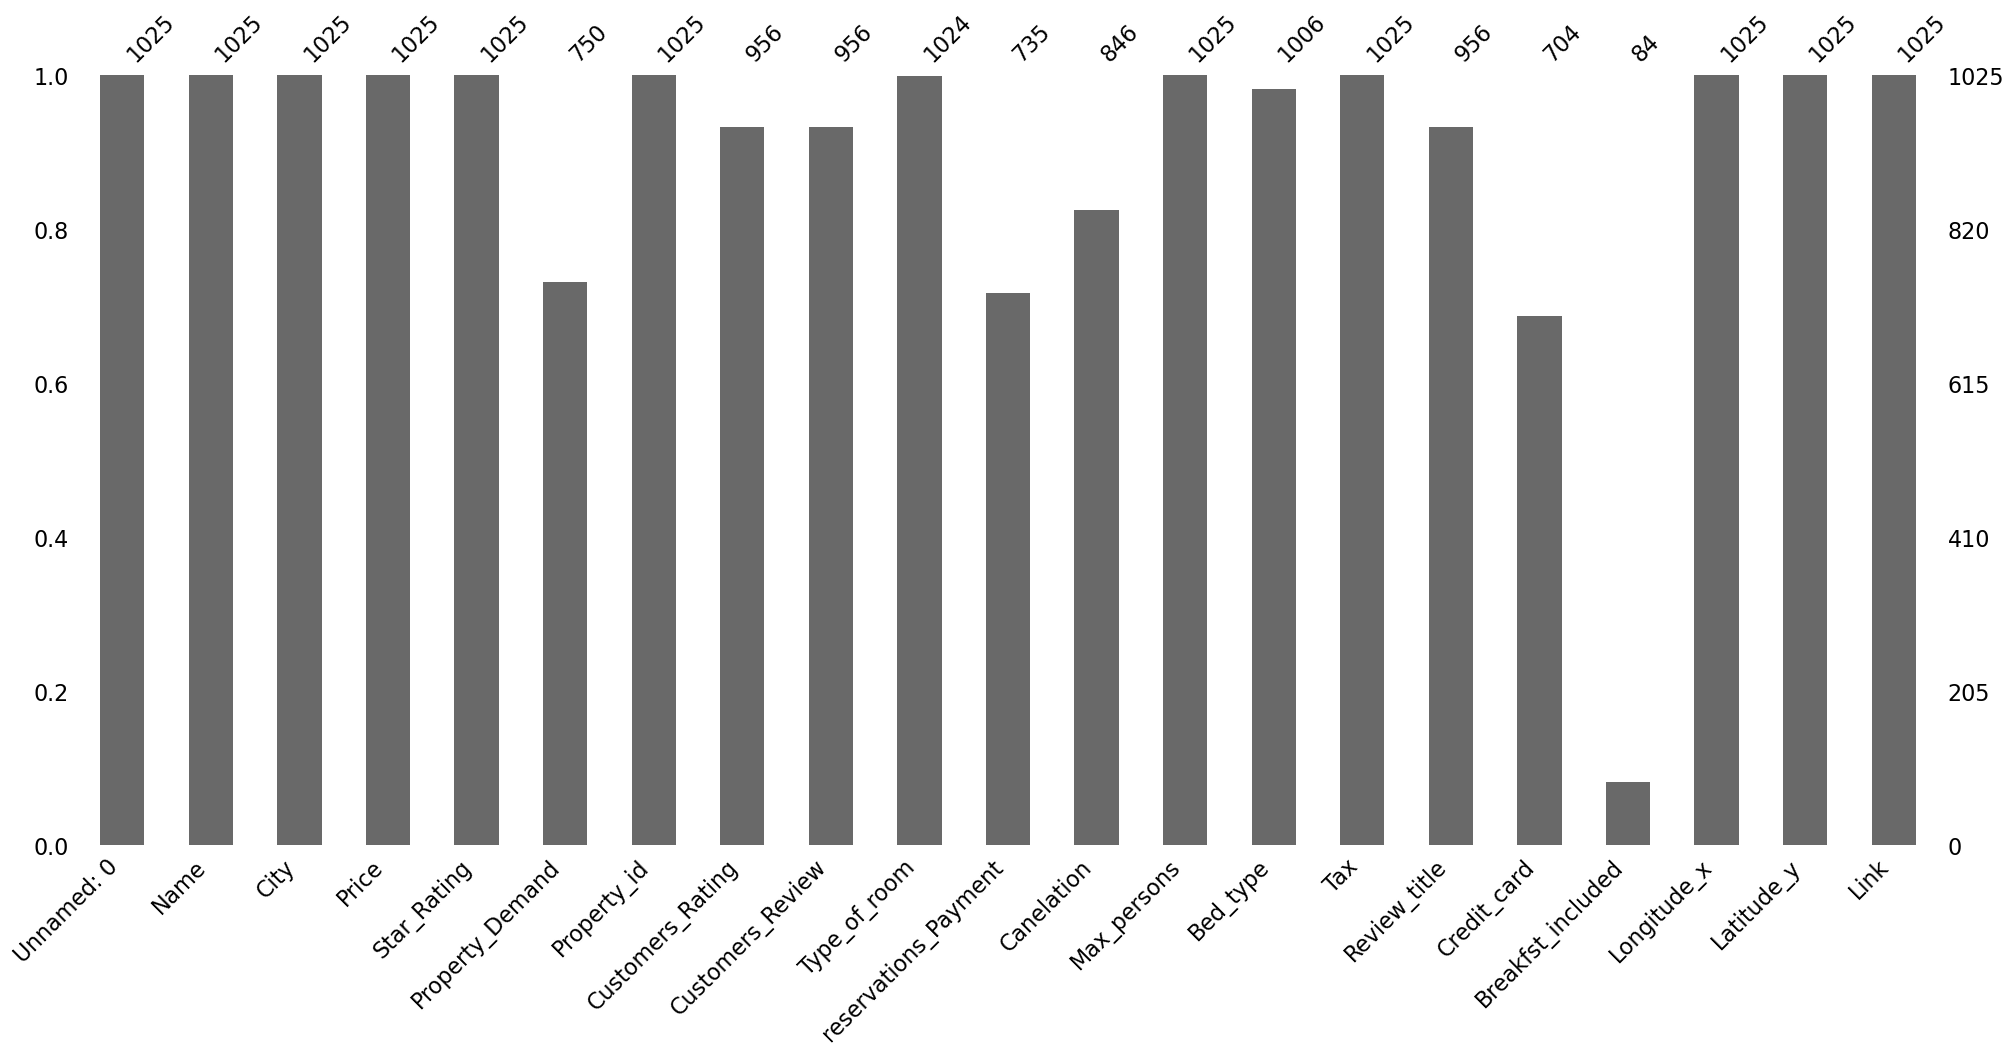

In [165]:
missingno.bar(df)
plt.show()

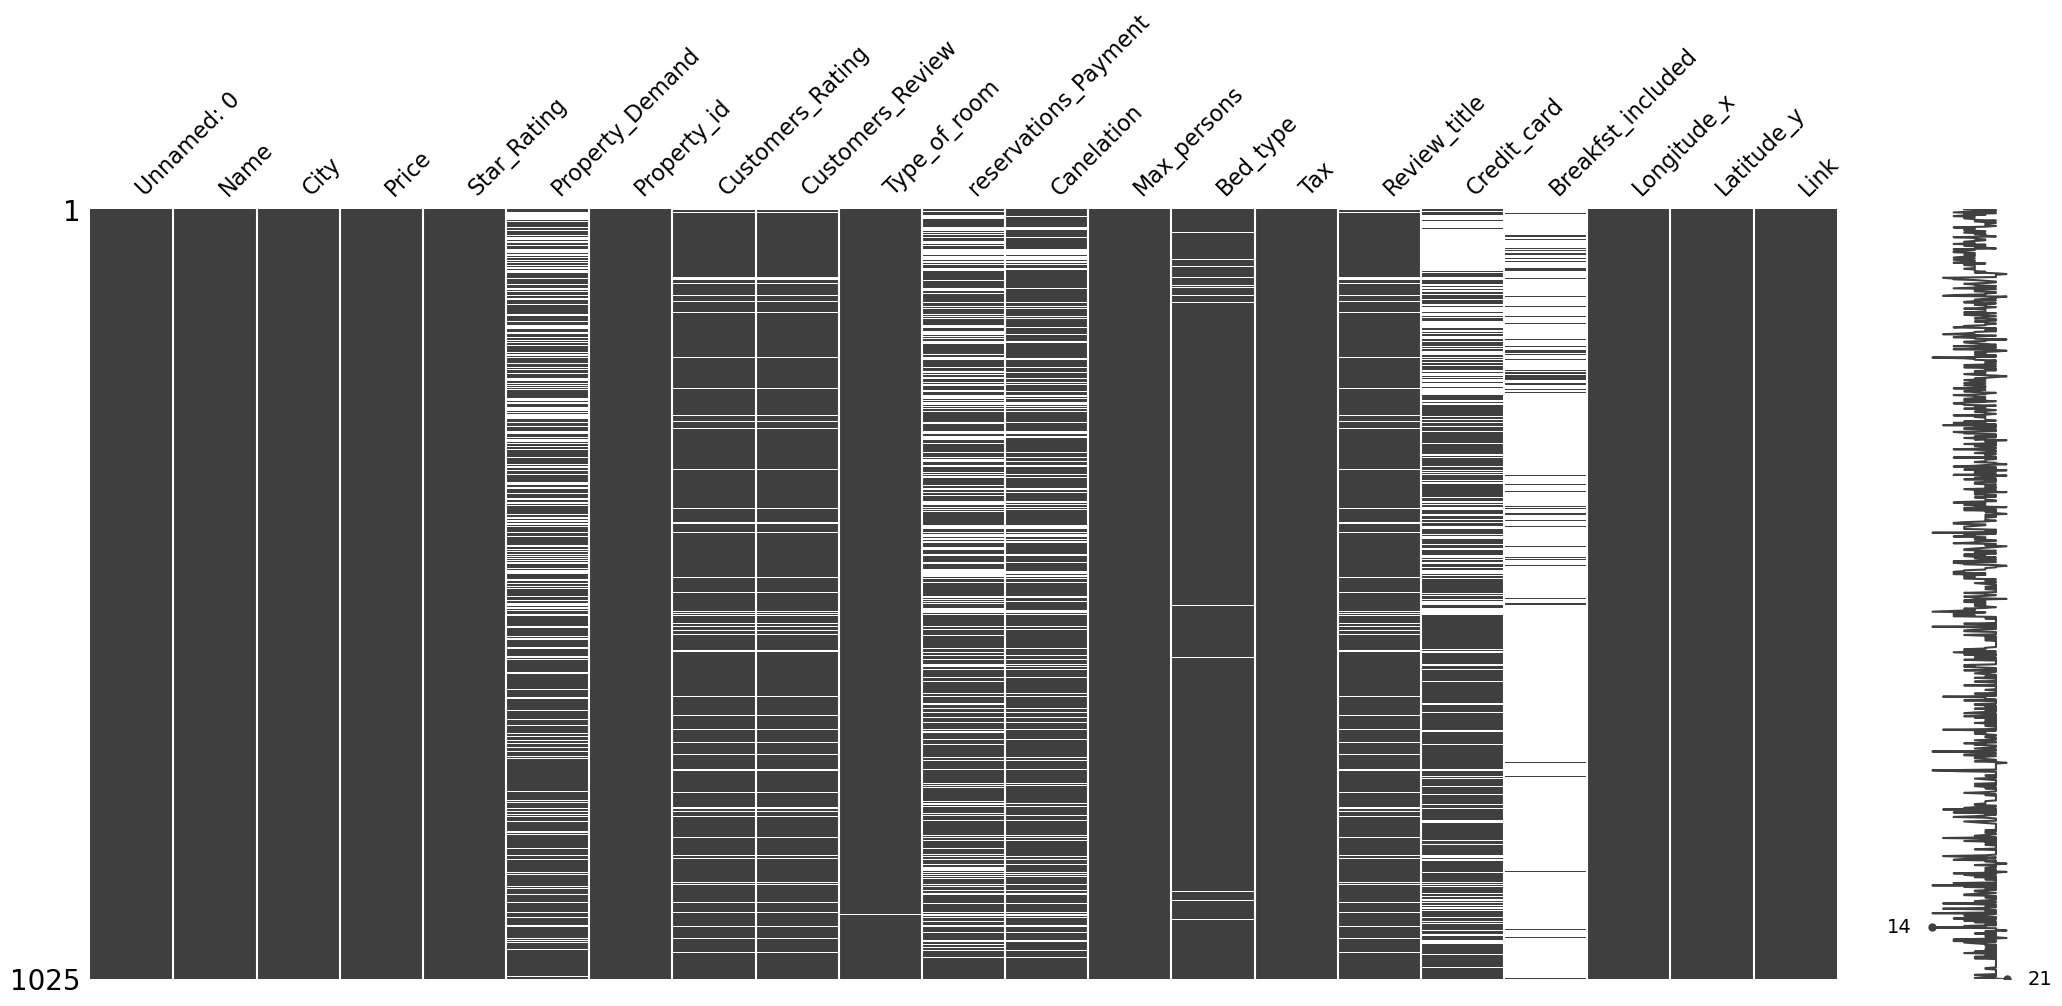

In [182]:
missingno.matrix(df)
plt.show() 
#missing values plot

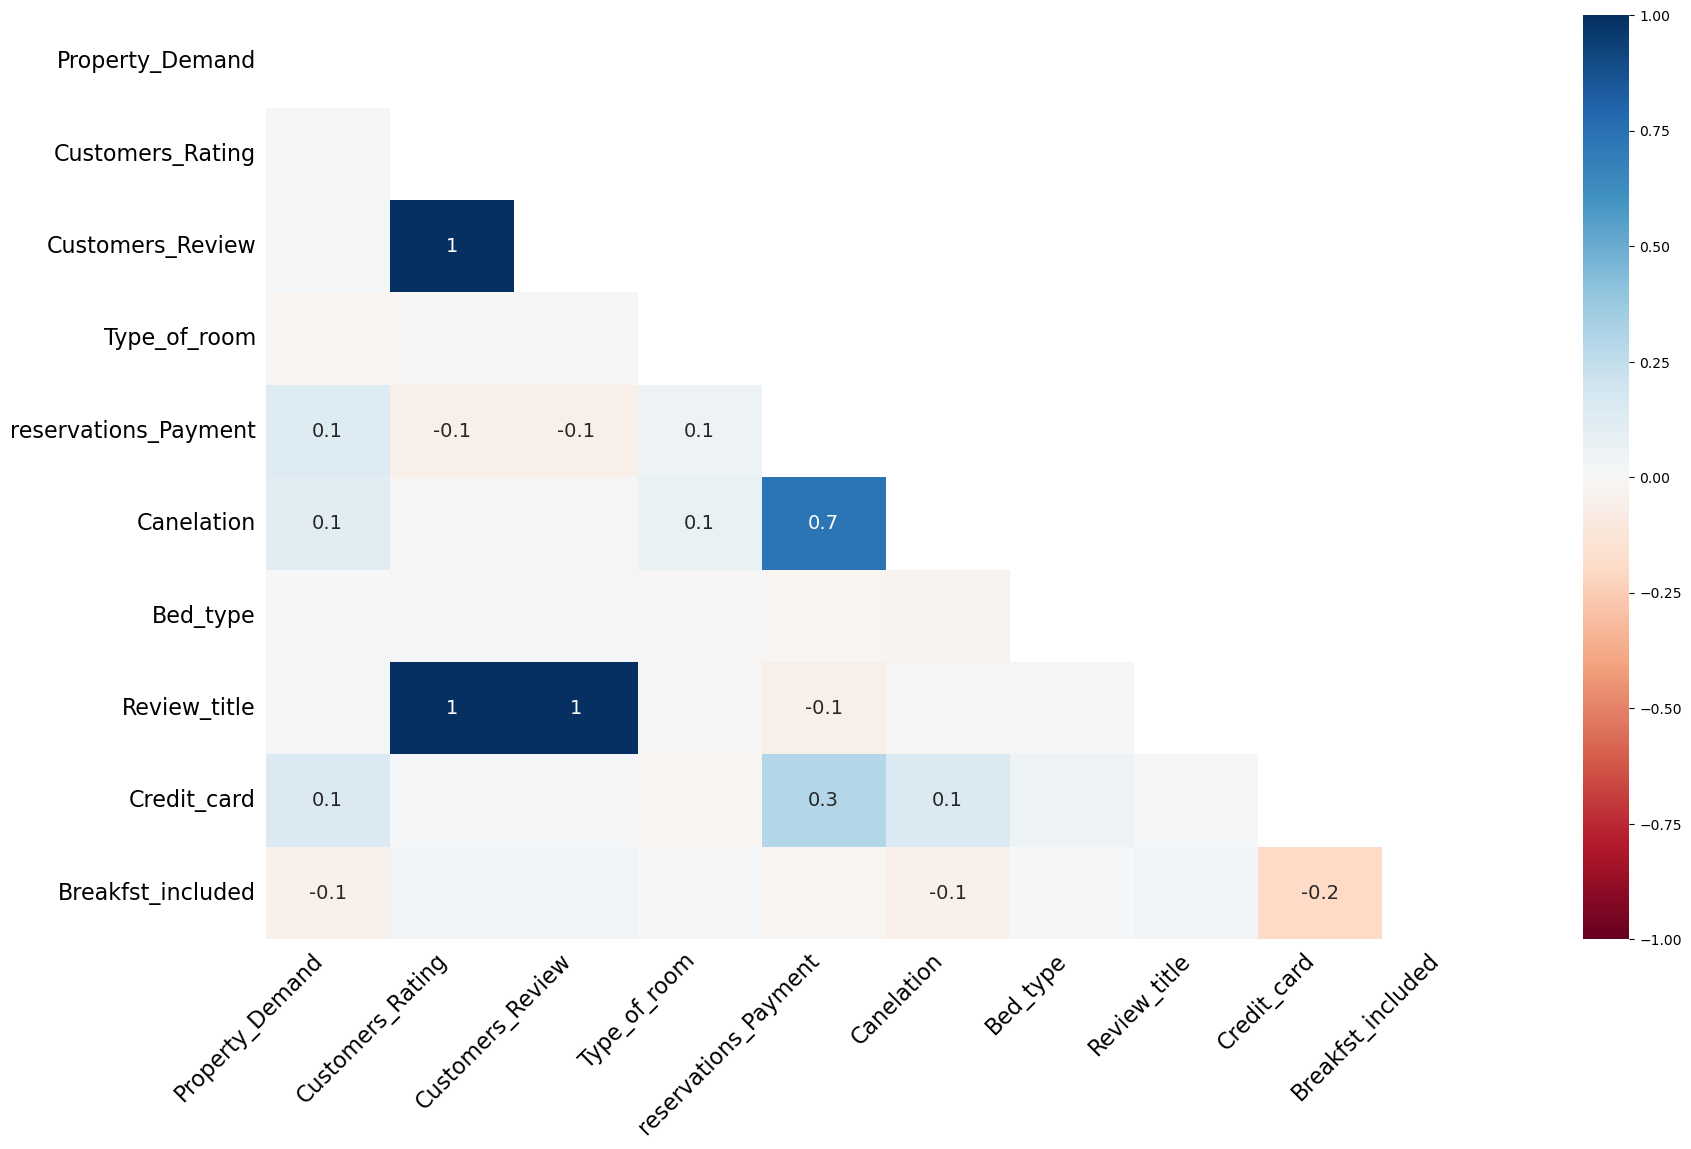

In [167]:
missingno.heatmap(df)
plt.show()
# We see that there is high dependency between 'Customers_Review'-'Customers_Rating', 
#'Review_title'-'Customers_Rating', 'Review_title'-'Customers_Review', which is expectable.
# Also "Cancelation" - "reservations_Payment" high correlated.

In [168]:
data.sort_values(by='Price', ascending=False)
# The most expensive hotel is "OYO 307 Jubail Rose" (SAR 7907.0) and the cheapest is "NASEEM" (SAR 23.0).

,Unnamed: 0,Name,City,Price,Star_Rating,Property_Demand,Property_id,Customers_Rating,Customers_Review,Type_of_room,...,Canelation,Max_persons,Bed_type,Tax,Review_title,Credit_card,Breakfst_included,Longitude_x,Latitude_y,Link
541,541,OYO 307 Jubail Rose,Al Jubayl,7907.0,2,No Info,5658276,0.0,0.0,One-Bedroom Apartment,...,FREE cancellation,3,1 bed\n(1 double),+SAR 593 taxes and charges,No Info,Reservation possible without a credit card,No,49.656016,26.989835,https://www.booking.com/hotel/sa/oyo-307-jubai...
490,490,OYO 381 Afg Aldurrah 1,Butainiyāt,4651.0,3,Only 1 left like this on our site,6019548,0.0,0.0,One-Bedroom Apartment,...,FREE cancellation,2,1 bed\n(1 extra-large double),+SAR 349 taxes and charges,No Info,Reservation possible without a credit card,No,43.954533,26.386261,https://www.booking.com/hotel/sa/oyo-381-afg-a...
82,82,Raffles Makkah Palace,"Ajyad, Makkah",3600.0,5,Only 7 like this left on our site,269018,9.1,4566.0,Signature Suite City View,...,No Info,2,1 bed\n(1 extra-large double),+SAR 369 taxes and charges,Superb,No Info,Breakfast included,39.825566,21.419643,https://www.booking.com/hotel/sa/raffles-makka...
81,81,Dana Beach Resort (Families Only),Half Moon Bay,3500.0,5,No Info,1348503,8.2,914.0,Two-Bedroom Sunset Villa with Sea View,...,FREE cancellation,4,"3 beds\n(2 singles, 1 large double)",+SAR 350 taxes and charges,Very good,No Info,Breakfast included,50.011933,26.079349,https://www.booking.com/hotel/sa/dana-beach-re...
80,80,Dar Al Tawhid Intercontinental Makkah,Makkah,3444.0,5,Only 6 rooms like this left on our site,278695,8.8,3785.0,Standard Room,...,No Info,2,2 beds\n(2 singles),+SAR 353 taxes and charges,Fabulous,No Info,Breakfast included,39.822443,21.420622,https://www.booking.com/hotel/sa/dar-al-tawhid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,550,Sunset fog,Dammam,25.0,0,Only 5 rooms like this left on our site,5727646,5.8,12.0,Double Room with Shared Bathroom,...,FREE cancellation,2,2 beds\n(2 singles),includes taxes and charges,Review score,Reservation possible without a credit card,No,50.046496,26.434519,https://www.booking.com/hotel/sa/sunset-fog.en...
549,549,REEMAL,Riyadh,25.0,0,Only 6 like this left on our site,3939379,3.4,6.0,Small Room,...,FREE cancellation,3,3 beds\n(3 singles),includes taxes and charges,Review score,Reservation possible without a credit card,No,46.829958,24.870716,https://www.booking.com/hotel/sa/mjm-strht-nwf...
548,548,‏Al Marqab (Males Only),Riyadh,25.0,0,Only 3 like this left on our site,1892336,4.0,14.0,Triple Room with Private Bathroom,...,FREE cancellation,3,3 beds\n(3 singles),+SAR 0 taxes and charges,Review score,Reservation possible without a credit card,No,46.724988,24.638360,https://www.booking.com/hotel/sa/nouf-furnishe...
547,547,Yamamah,"Al Yamamah, Riyadh",24.0,0,Only 2 like this left on our site,1887908,4.1,45.0,Twin Room,...,FREE cancellation,2,2 beds\n(2 singles),+SAR 2 taxes and charges,Review score,Reservation possible without a credit card,No,46.716059,24.601738,https://www.booking.com/hotel/sa/nof-residenti...


In [177]:
num_cols = data.dtypes[df.dtypes != "O"].index.tolist()
num_cols.remove('Unnamed: 0')

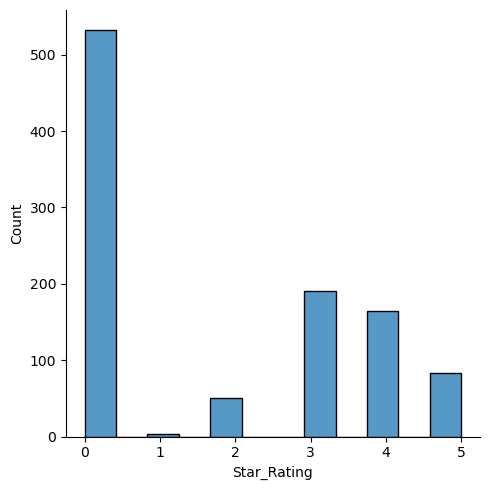

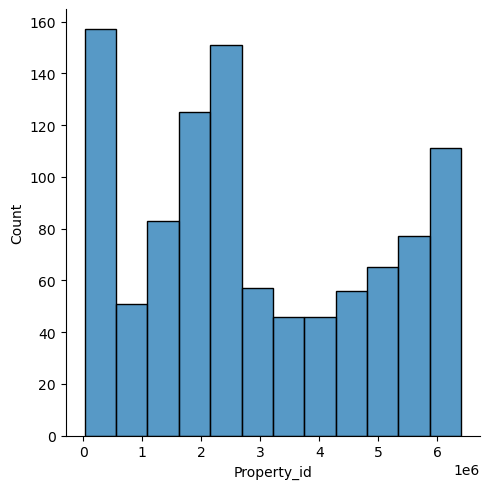

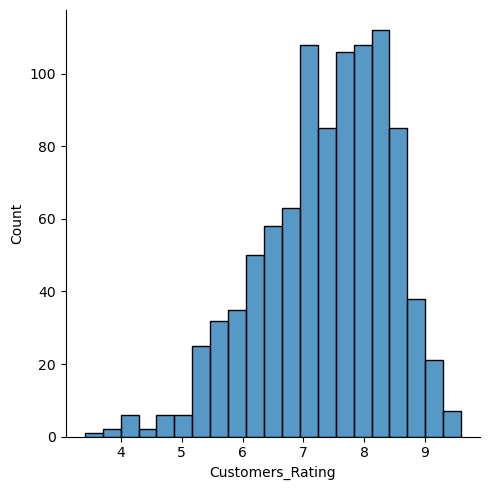

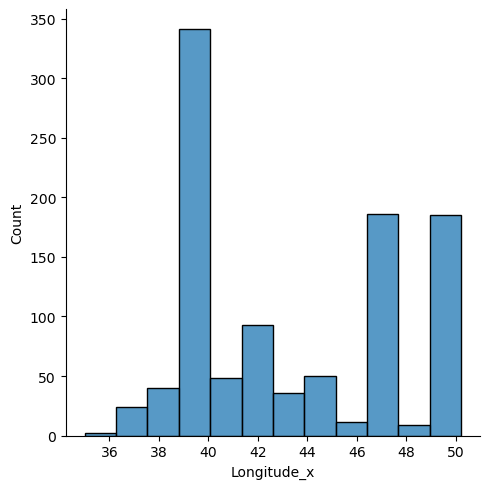

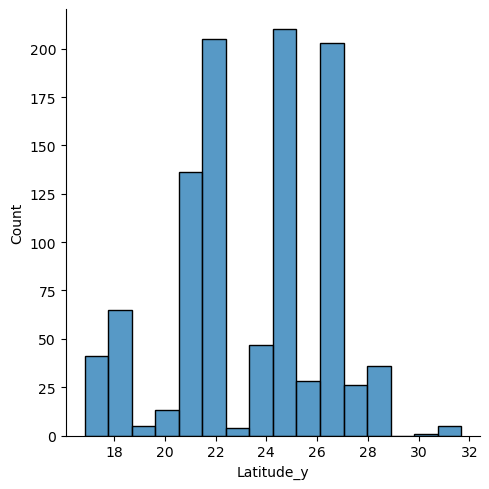

In [178]:
for num_col in num_cols:
  sns.displot(df[num_col], kde=False)
  plt.show()

In [179]:
unique_cities = np.unique(", ".join(data['City'].values).split(", "))

In [180]:
unique_cities.size

115

In [181]:
cities = frequency_table(data['City'])
cities.sort_values(by='count', ascending=False)
#So the greatest amount of hotels is in city "Riyadh"

col_0,count
City,
Riyadh,132
Jeddah,98
Dammam,59
Makkah,50
"Al Olayya, Al Khobar",38
...,...
Hotat bani tamim,1
Jarwal,1
Al ‘Azīzīyah,1
